<a href="https://colab.research.google.com/github/itman0101/ML-practices/blob/master/decision_tree_and_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


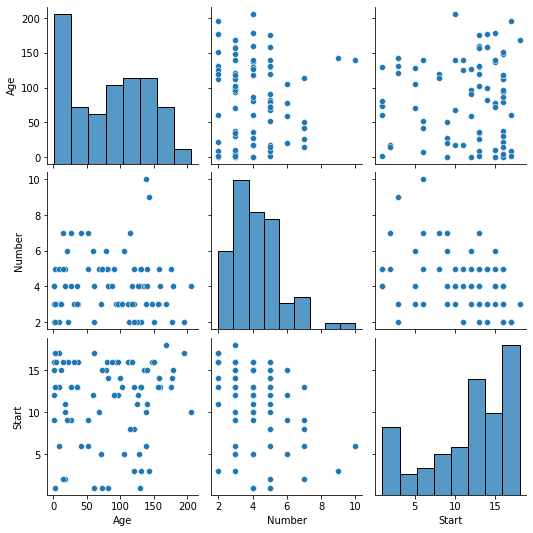

In [6]:
sns.pairplot(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('Kyphosis',axis=1)

In [10]:
y = df['Kyphosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier()

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
predictions = dtree.predict(X_test)

In [16]:
from sklearn.metrics import  classification_report,confusion_matrix

In [19]:
print(confusion_matrix(y_test,predictions))
print('/n')
print(classification_report(y_test,predictions))

[[14  3]
 [ 6  2]]
/n
              precision    recall  f1-score   support

      absent       0.70      0.82      0.76        17
     present       0.40      0.25      0.31         8

    accuracy                           0.64        25
   macro avg       0.55      0.54      0.53        25
weighted avg       0.60      0.64      0.61        25



In [20]:
from sklearn.ensemble import  RandomForestClassifier

In [23]:
rfc =RandomForestClassifier()

In [24]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
rfc_pred = rfc.predict(X_test)

In [26]:
print(confusion_matrix(y_test,rfc_pred))
print('/n')
print(classification_report(y_test,rfc_pred))

[[16  1]
 [ 8  0]]
/n
              precision    recall  f1-score   support

      absent       0.67      0.94      0.78        17
     present       0.00      0.00      0.00         8

    accuracy                           0.64        25
   macro avg       0.33      0.47      0.39        25
weighted avg       0.45      0.64      0.53        25

